# CFG Final Project
## Our question is: 

### What have the environmental impacts been on the SpaceX rocket launches, and how could SpaceX minimise their impact moving forward?
- How do SpaceX Rocket launches compare over time? e.g. fuel emissions, fuel types. 
- What is the Space X “space debris” impact? 
- Bonus question: compare space x launches with other countries/locations
- Bonus Machine learning Qs: Predict the amount of space debris is X amount of years. 


Loading Data:

Do we need a SQL Database? I don't think we do... This is a 2 sheet excel spreadsheet so would overcomplicate our queries. 

In [46]:
import pandas as pd 

In [60]:
#Please ensure that the "Launch and ...." sheet is in the same folder as the .pynb file, which it should be if you pulled from Git.

all_launch_df = pd.read_excel("Launch and re-entry database.xlsx", sheet_name="2019 launches")

In [61]:
all_launch_df.head()

,Time (UTC),Day,Month,Year,Latitude,Longitude,Launch location,Rocket Type,Booster fuel type,Stage 1 fuel type,...,"Boosters mass (each, kg)","Boosters mass (total, kg)",Stage 1 mass (kg),Stage 2 mass (kg),Stage 3 mass (kg),Stage 4 mass (kg),Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg)
0,17.083333,10,1,2019,28.246,102.027,Xichang,CZ-3B/G3,4 x Hypergolic,Hypergolic,...,41100,164400,186200,32600,18200,0,0,18200,383200,0
1,15.516667,11,1,2019,34.632,-120.611,Vandenberg,Falcon-9 v1.2 (Block 5),NaN,Kerosene,...,0,0,418700,111500,0,0,530200,0,0,0
2,0.833333,18,1,2019,31.251,131.082,Kagoshima,Epsilon (2) CLPS,NaN,Solid (HTPB),...,0,0,66000,15000,2500,145,0,0,145,83500
3,19.083333,19,1,2019,34.582,-120.626,Vandenberg,Delta-4H (upg.),2 x Hydrogen,Hydrogen,...,204000,408000,204000,27200,0,0,0,639200,0,0
4,5.700000,21,1,2019,40.961,100.298,Jiuquan,CZ-11,NaN,Solid,...,0,0,35000,10000,4050,220,0,0,0,49270


In [62]:
reentries_df = pd.read_excel("Launch and re-entry database.xlsx", sheet_name="2019 re-entries")

In [63]:
reentries_df.head()

,Controlled?,Time (UTC),Day,Month,Year,Latitude,Longitude,Name,Type,Part,Booster separation altitude (km),Booster mass (km),First stage mass (km),Second stage mass (km),Total Mass (km),NOx from re-entry (km)
0,N,1.516667,1.0,1.0,2019.0,7.823,54.164,CZ-2D,Rocket body,NaN,NaN,NaN,NaN,NaN,5500.0,5500.0
1,N,7.966667,5.0,1.0,2019.0,-43.753,-179.976,Cosmos 2430,Payload,NaN,NaN,NaN,NaN,NaN,1900.0,1900.0
2,N,9.533333,5.0,1.0,2019.0,-1.205,89.746,Faclon 9,Rocket body,Second stage,NaN,NaN,NaN,NaN,4500.0,4500.0
3,N,17.133333,10.0,1.0,2019.0,28.246,102.027,CZ-3B/G3,Rocket body,First stage & boosters,50.0,15600.0,9800.0,4000.0,29400.0,14700.0
4,Y,15.566667,11.0,1.0,2019.0,34.632,-120.611,Falcon-9 v1.2 (Block 5),Rocket body,First stage,NaN,0.0,27200.0,NaN,27200.0,4760.0


## Loading SpaceX API 

I started off by importing the "requests" library and reading the data as a JSON format. You have to use pretty print to see the data nicely in an easy-to-read way. 

In [54]:
import requests
from pprint import pprint as pp

endpoint = 'https://api.spacexdata.com/v3/launches'

response = requests.get(endpoint)
data = response.json()
pp(data)

[{'crew': None,
  'details': 'Engine failure at 33 seconds and loss of vehicle',
  'flight_number': 1,
  'is_tentative': False,
  'launch_date_local': '2006-03-25T10:30:00+12:00',
  'launch_date_unix': 1143239400,
  'launch_date_utc': '2006-03-24T22:30:00.000Z',
  'launch_failure_details': {'altitude': None,
                             'reason': 'merlin engine failure',
                             'time': 33},
  'launch_site': {'site_id': 'kwajalein_atoll',
                  'site_name': 'Kwajalein Atoll',
                  'site_name_long': 'Kwajalein Atoll Omelek Island'},
  'launch_success': False,
  'launch_window': 0,
  'launch_year': '2006',
  'links': {'article_link': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html',
            'flickr_images': [],
            'mission_patch': 'https://images2.imgbox.com/40/e3/GypSkayF_o.png',
            'mission_patch_small': 'https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png',
            'presskit': None,
     

  'rocket': {'fairings': {'recovered': False,
                          'recovery_attempt': False,
                          'reused': False,
                          'ship': None},
             'first_stage': {'cores': [{'block': 5,
                                        'core_serial': 'B1048',
                                        'flight': 2,
                                        'gridfins': True,
                                        'land_success': True,
                                        'landing_intent': True,
                                        'landing_type': 'RTLS',
                                        'landing_vehicle': 'LZ-4',
                                        'legs': True,
                                        'reused': True}]},
             'rocket_id': 'falcon9',
             'rocket_name': 'Falcon 9',
             'rocket_type': 'FT',
             'second_stage': {'block': 5,
                              'payloads': [{'customers': ['CONAE'],

Then I imported "pandas" library and attempted to create a dataframe using the JSON file. I think the API was too big and missed out lots of data.  

In [55]:
import pandas as pd
df = pd.read_json("https://api.spacexdata.com/v3/launches")
df

,flight_number,mission_name,mission_id,upcoming,launch_year,launch_date_unix,launch_date_utc,launch_date_local,is_tentative,tentative_max_precision,...,static_fire_date_unix,timeline,crew,last_date_update,last_ll_launch_date,last_ll_update,last_wiki_launch_date,last_wiki_revision,last_wiki_update,launch_date_source
0,1,FalconSat,[],False,2006,1143239400,2006-03-24T22:30:00.000Z,2006-03-25T10:30:00+12:00,False,hour,...,1.142554e+09,{'webcast_liftoff': 54},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,DemoSat,[],False,2007,1174439400,2007-03-21T01:10:00.000Z,2007-03-21T13:10:00+12:00,False,hour,...,NaN,{'webcast_liftoff': 60},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Trailblazer,[],False,2008,1217734440,2008-08-03T03:34:00.000Z,2008-08-03T15:34:00+12:00,False,hour,...,NaN,{'webcast_liftoff': 14},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,RatSat,[],False,2008,1222643700,2008-09-28T23:15:00.000Z,2008-09-28T11:15:00+12:00,False,hour,...,1.221869e+09,{'webcast_liftoff': 5},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,RazakSat,[],False,2009,1247456100,2009-07-13T03:35:00.000Z,2009-07-13T15:35:00+12:00,False,hour,...,NaN,{'webcast_liftoff': 5},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,Crew-1,[EE86F74],False,2020,1605486420,2020-11-16T00:27:00.000Z,2020-11-15T19:27:00-05:00,False,hour,...,NaN,None,[],2020-11-13T21:31:19.000Z,None,None,2020-11-16T00:27:00.000Z,90e9da15-25f7-11eb-badd-0e3a392f3e47,2020-11-13T21:31:19.000Z,wiki
107,108,Sentinel-6 Michael Freilich,[],False,2020,1605979020,2020-11-21T17:17:00.000Z,2020-11-21T09:17:00-08:00,False,hour,...,1.605619e+09,None,None,2020-11-17T19:27:21.000Z,2020-11-21T17:17:00.000Z,2020-11-05T23:48:07.000Z,2020-11-21T17:17:00.000Z,e93220d1-290a-11eb-bd82-0e4885cc0cd7,2020-11-17T19:27:21.000Z,wiki
108,109,Starlink-15 (v1.0),[],False,2020,1603553460,2020-10-24T15:31:00.000Z,2020-10-24T11:31:00-04:00,False,hour,...,1.605976e+09,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,110,CRS-21,[EE86F74],True,2020,1607271420,2020-12-06T16:17:00.000Z,2020-12-06T11:17:00-05:00,False,hour,...,NaN,None,None,2020-12-05T13:04:54.000Z,None,None,2020-12-06T16:17:00.000Z,774e7809-36fa-11eb-a5dc-0e33339b29dd,2020-12-05T13:04:54.000Z,wiki


## Using this website - https://github.com/shawnmavunga/Space_X_Launches_Data_Analysis

Requesting the rocket launch data from the SpaceX API as before, but using the past rocket launch data. Also checking the content of the response as before, but not using pretty print. 

In [56]:
spacex_url="https://api.spacexdata.com/v4/launches/past"
response = requests.get(spacex_url)
print(response.content) 

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

## json_normalise() 
After some research, I found this function. It is a method from the pandas library that converts nested JSON data objects into DataFrames - each nested level in the JSON object is turned into a new column/Series in the DF. 

In [57]:
json1 = response.json()
data = pd.json_normalize(json1)
data

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,https://youtu.be/NONM-xsKMSs,NONM-xsKMSs,None,None,NaN
183,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,None,None,None,None,NaN
184,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,https://youtu.be/ZlQHF_yBkMQ,ZlQHF_yBkMQ,None,None,NaN
185,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,https://youtu.be/VVu2bSJJhgI,VVu2bSJJhgI,None,None,NaN


However, when doing this alot of the data is IDs and not the names that we need which makes it hard to read and hard to analyse. For example, the rocket column has no info about the rocket, just the ID number. 

The next set of code uses the API again to get information about the launches using the IDs for each space launch. 

## Definitions:
'payload' - a payload in terms of a rocket launch is any cargo/equipment that is carried by a rocket and intended to be deployed in space or delivered to a specific destination. It is typically placed on top of the rocket and separated from the rocket's stages once it reaches its destination. The rocket is designed to carry the payload into space. 
'launchpad' - The facility where the rocket is launched from
'cores' - a core in terms of a rocket launch refers to the central structure of a rocket's main engine - it can be multiple cores. It can be reusable for future launches, and in this case the core includes not only the main engine, but also additional equipment such as landing legs, guidance systems, and parachutes. The ability to recover and reuse rocket cores can significantly reduce the cost of spaceflight, as it eliminates the need to build a new rocket for each launch. SpaceX's Falcon 9 rocket, for example, uses reusable first-stage cores that can be landed and recovered for future launches.

In [83]:
#subset of our dataframe keeping only the features we want and the flight number
data = data[['rocket', 'success', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
# data = data[data['cores'].map(len)==1]
# data = data[data['payloads'].map(len)==1]

# # Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
# data['cores'] = data['cores'].map(lambda x : x[0])
# data['payloads'] = data['payloads'].map(lambda x : x[0])

# Convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date
data

C:\Users\holly\AppData\Local\Temp\ipykernel_31224\3104805211.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date_utc']).dt.date


,rocket,success,payloads,launchpad,cores,flight_number,date_utc,date
0,5e9d0d95eda69955f709d1eb,False,[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,"[{'core': '5e9e289df35918033d3b2623', 'flight'...",1,2006-03-24T22:30:00.000Z,2006-03-24
1,5e9d0d95eda69955f709d1eb,False,[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef35918416a3b2624', 'flight'...",2,2007-03-21T01:10:00.000Z,2007-03-21
2,5e9d0d95eda69955f709d1eb,False,"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006e...",5e9e4502f5090995de566f86,"[{'core': '5e9e289ef3591814873b2625', 'flight'...",3,2008-08-03T03:34:00.000Z,2008-08-03
3,5e9d0d95eda69955f709d1eb,True,[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef3591855dc3b2626', 'flight'...",4,2008-09-28T23:15:00.000Z,2008-09-28
4,5e9d0d95eda69955f709d1eb,True,[5eb0e4b7b6c3bb0006eeb1e6],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef359184f103b2627', 'flight'...",5,2009-07-13T03:35:00.000Z,2009-07-13
...,...,...,...,...,...,...,...,...
182,5e9d0d95eda69973a809d1ec,True,"[631614e9ffc78f3b85670717, 631617fbffc78f3b856...",5e9e4501f509094ba4566f84,"[{'core': '5e9e28a6f359183c413b265d', 'flight'...",183,2022-09-05T02:09:00.000Z,2022-09-05
183,5e9d0d95eda69973a809d1ec,True,"[63161610ffc78f3b85670718, 63161872ffc78f3b856...",5e9e4502f509094188566f88,"[{'core': '5e9e28a7f3591817f23b2663', 'flight'...",184,2022-09-11T01:10:00.000Z,2022-09-11
184,5e9d0d95eda69973a809d1ec,True,[63161699ffc78f3b85670719],5e9e4501f509094ba4566f84,"[{'core': '60b800111f83cc1e59f16438', 'flight'...",185,2022-09-17T01:05:00.000Z,2022-09-17
185,5e9d0d95eda69973a809d1ec,True,[631616a7ffc78f3b8567071a],5e9e4501f509094ba4566f84,"[{'core': '627843d657b51b752c5c5a53', 'flight'...",186,2022-09-24T23:30:00.000Z,2022-09-24


### From each subset (nested JSON), we want to know specific data... 

From the ROCKET subset, we want to know the booster name i.e. the name of the Rocket (Falcon 1, Falcon 9). This will help us compare rocket launch data with other DataFrames. 

From the PAYLOAD, we want to know the mass of the payload, and the orbit that it is going to. This will help us compare rocket launch data with other DataFrames. 

From the LAUNCHPAD, we want to know the name of the launchsite being used, the longitude and the latitude. This can then be used to compare with other rocket launches. 

From CORES, we want to know the outcome of the langing, the type of landing, the number of flights with the reusable core, whether gridfins were used (a grid fin stabilizer used to steer and stabailise a rocket during its descent through the atmosphere), whether legs were used, the landing pad is used, and some data about the cores. 


We have set up some empty lists. To get this information from the JSON, we need to create some functions with for loops to iterate throught the file and append the data to the empty lists. 

In [82]:
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

Test that the list is empty before you run the code for the function. 

In [84]:
BoosterVersion

[]

## Understand the code for the function  

1. The function takes the parameter data (which is the JSON file from above)
2. The column ['rocket'] contains the rocket IDs - we have created a for loop saying for every rocket ID in the rocket column, the function sends a GET request to the SpaceX API to retrieve any additional data about the rocket, specifically to get the booster name. 
3. The name of each rocket is retrived from the API and it is appended to the BoosterVersion list. 

In [85]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list

def getBoosterVersion(data):
    for x in data['rocket']:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

getBoosterVersion(data)

Testing the list is full of Booster names, sliced the list so we don't get the full list. 

In [87]:
BoosterVersion[0:8]

['Falcon 1',
 'Falcon 1',
 'Falcon 1',
 'Falcon 1',
 'Falcon 1',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9']

## Understand the code for the function  
Very similar to the code above - 
1. The function takes the parameter data (which is the JSON file from above)
2. The column ['launchpad'] contains the launchpad IDs - we have created a for loop saying for every launchpad ID in the 'launchpad' column, the function sends a GET request to the SpaceX API to retrieve any additional data about the launchpad, specifically to get the launchsite, longitude and latitude. 
3. The longitude, latitude and LaunchSite of each launchpad is retrieved from the API and appended to the respective list.

In [88]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
        response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])
        LaunchSite.append(response['name'])



In [89]:
getLaunchSite(data)

## Understand the code for the function  

Again the function is very similar to the above 2 functions - 

1. The function takes the parameter data (which is the JSON file from above)
2. The column ['payloads'] contains the payload IDs - we have created a for loop saying for every payload ID in the payload column, the function sends a GET request to the SpaceX API to retrieve any additional data about the payload, specifically to get the mass (in KG) and the type of orbit it is intended to reach. 
3. The Payload in kg and the Orbit information is appended to their respective lists.

In [90]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for loads in data['payloads']:
        for load in loads:
            response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
            PayloadMass.append(response['mass_kg'])
            Orbit.append(response['orbit'])

In [91]:
getPayloadData(data)

## Understand the code for the function  

The function is similar to the above functions, except it now uses an if/else statement- 

1. The function takes the parameter data (which is the JSON file from above)
2. The column ['core'] contains the core IDs - we have created a for loop saying for every core ID in the core column, the function sends a GET request to the SpaceX API to retrieve any additional data about the cores, specifically its block number, reuse count, serial number, landing outcome, number of flights, gridfin status, reuse status, number of legs, and landing pad location. 
3. Because of the added if/else statement - If the core ID in the current iteration is NOT equal to None, (meaning it is equal to a valid core ID), the retrieved data for the core is appended to their respective lists: 'Block', 'ReusedCount', and 'Serial'.
4. ELSE - If the core ID IS EQUAL to None, then the corresponding data for the core is set to None and appended to their respective lists: 'Block', 'ReusedCount', and 'Serial'. 

The landing outcome for the core is also appended to the 'Outcome' list, and the remaining core data ('Flights', 'GridFins', 'Reused', 'Legs', and 'LandingPad') is appended to their respective lists regardless of whether the core ID is None or not. This is beacuse this code is outside of the if/else statements. 

In [92]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for cores in data['cores']:
        for core in cores:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [93]:
getCoreData(data)

Constructing our new dataset using the data we have obtained. Combining the columns into a dictionary. The Key is the column name and the Values are the lists from above. 

In [95]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'RocketName':BoosterVersion,
'PayloadMassKG':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

Creating a new Pandas DF using the dictionary we have just created above. The .shape tells us how many rows and columns our DF has. 

In [96]:
# Create a data from launch_dict
dflaunch = pd.DataFrame.from_dict(launch_dict, orient='index').transpose()
dflaunch.shape

(216, 17)

And here is our new Dataframe!! :) 

In [97]:
# Show the head of the dataframe
dflaunch.head(5)

,FlightNumber,Date,RocketName,PayloadMassKG,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin2A,167.743129,9.047721
2,3,2008-08-03,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin1C,167.743129,9.047721
3,4,2008-09-28,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin2C,167.743129,9.047721
4,5,2009-07-13,Falcon 1,165,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin3C,167.743129,9.047721


### Reading in the Kaggle "Space Decay CSV"

**Source Data**: A database on ‘flying objects’ that are currently within the Earth’s orbit, including satellites and rocket launch debris. The data has been extracted from an API provided by space-track.org  https://www.kaggle.com/datasets/kandhalkhandeka/satellites-and-debris-in-earths-orbit

In [9]:
import pandas as pd
df_space_decay = pd.read_csv('space_decay.csv')
df_space_decay.head()

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:46:11,18 SPCS,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,...,MEDIUM,FR,1992.0,FRGUI,NaN,3195178,188614016,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...
1,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,...,SMALL,CIS,1979.0,PKMTR,NaN,3194950,188593285,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...
2,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:26:11,18 SPCS,GSAT 1,2001-015A,EARTH,TEME,UTC,SGP4,...,LARGE,IND,2001.0,SRI,NaN,3195026,188609573,0 GSAT 1,1 26745U 01015A 21305.22411368 -.00000165 0...,2 26745 12.1717 16.5368 0237386 250.1248 146...
3,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,CZ-4 DEB,1999-057MB,EARTH,TEME,UTC,SGP4,...,SMALL,PRC,1999.0,TSC,NaN,3194431,188556894,0 CZ-4 DEB,1 26754U 99057MB 21304.46625230 .00002265 0...,2 26754 98.4781 8.7205 0060618 37.3771 323...
4,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,CZ-4 DEB,1999-057MC,EARTH,TEME,UTC,SGP4,...,SMALL,PRC,1999.0,TSC,NaN,3194950,188592541,0 CZ-4 DEB,1 26755U 99057MC 21304.74081807 .00002610 0...,2 26755 98.4232 122.0724 0062255 345.1605 27...


In [8]:
df_space_decay.describe()

,CCSDS_OMM_VERS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,...,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,LAUNCH_DATE,DECAY_DATE,FILE,GP_ID
count,14372.0,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.0,14372.000000,14372.0,...,14372.000000,1.437200e+04,14372.000000,14372.000000,14372.000000,14372.000000,14333.000000,0.0,1.437200e+04,1.437200e+04
mean,2.0,12.463847,0.067168,74.354208,182.353111,165.977199,191.015595,0.0,39558.160381,999.0,...,0.000049,2.307751e-07,10636.185210,223.521557,5721.060178,2795.040245,2004.507570,NaN,3.194186e+06,1.885638e+08
std,0.0,4.509305,0.181547,29.626780,116.717713,104.461866,109.873807,0.0,7619.846133,0.0,...,0.002391,1.485939e-05,9580.627227,446.517041,13016.299008,7943.045264,13.565227,NaN,3.119117e+03,1.393616e+05
min,2.0,0.051783,0.000005,0.001400,0.020000,0.008200,0.004800,0.0,26741.000000,999.0,...,-0.014873,-4.210300e-05,6542.850000,87.783000,183.393000,73.279000,1961.000000,NaN,3.142499e+06,1.860926e+08
25%,2.0,13.452144,0.000725,53.055300,71.987350,77.363475,90.001600,0.0,33965.750000,999.0,...,0.000001,0.000000e+00,6956.246750,96.232750,599.876000,546.115000,1997.000000,NaN,3.194431e+06,1.885665e+08
50%,2.0,14.277052,0.003416,86.369200,189.460250,150.483900,206.957400,0.0,40165.500000,999.0,...,0.000010,0.000000e+00,7177.549000,100.861000,843.686000,702.433500,2002.000000,NaN,3.194950e+06,1.885986e+08
75%,2.0,14.963745,0.013505,98.565125,292.484750,258.328550,284.163200,0.0,45173.500000,999.0,...,0.000032,0.000000e+00,7468.055000,107.046000,1207.919500,831.959750,2018.000000,NaN,3.195064e+06,1.886107e+08
max,2.0,16.404097,0.897218,144.586200,359.967900,359.989900,359.981900,0.0,270288.000000,999.0,...,0.225321,1.654800e-03,304049.635000,27808.429000,372136.402000,224547.015000,2021.000000,NaN,3.195727e+06,1.886250e+08


## Data Cleaning

In [10]:
#Checking space_deacy.csv for NaN values

nan_values = df_space_decay.isna()
nan_values

#DECAY_DATE column is empty - to be removed
#Columns not required for analysis  - CCSDS_OMM_VERS, COMMENT, CREATION_DATE, ORIGINATOR, FILE, GP_ID



,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14367,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
14368,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
14369,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
14370,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False


In [28]:
# Drop the columns with all NaN values:

#df_space_decay.dropna(axis=1, how='all')

,CCSDS_OMM_VERS,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,...,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,2021-10-31T22:46:50.340864,2.921700,0.652893,...,27784.871,796.095,DEBRIS,MEDIUM,FR,1992.0,FRGUI,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...
1,2,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,2021-10-31T16:32:17.360448,13.754973,0.003072,...,1002.507,957.299,DEBRIS,SMALL,CIS,1979.0,PKMTR,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...
2,2,GSAT 1,2001-015A,EARTH,TEME,UTC,SGP4,2021-11-01T05:22:43.421952,1.038224,0.023739,...,35797.696,33841.738,PAYLOAD,LARGE,IND,2001.0,SRI,0 GSAT 1,1 26745U 01015A 21305.22411368 -.00000165 0...,2 26745 12.1717 16.5368 0237386 250.1248 146...
3,2,CZ-4 DEB,1999-057MB,EARTH,TEME,UTC,SGP4,2021-10-31T11:11:24.198720,14.775907,0.006062,...,679.465,594.417,DEBRIS,SMALL,PRC,1999.0,TSC,0 CZ-4 DEB,1 26754U 99057MB 21304.46625230 .00002265 0...,2 26754 98.4781 8.7205 0060618 37.3771 323...
4,2,CZ-4 DEB,1999-057MC,EARTH,TEME,UTC,SGP4,2021-10-31T17:46:46.681248,14.724482,0.006226,...,697.039,609.491,DEBRIS,SMALL,PRC,1999.0,TSC,0 CZ-4 DEB,1 26755U 99057MC 21304.74081807 .00002610 0...,2 26755 98.4232 122.0724 0062255 345.1605 27...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14367,2,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,2021-10-12T13:30:18.264096,15.465781,0.001190,...,434.844,418.650,TBA,NaN,NaN,NaN,NaN,0 TBA - TO BE ASSIGNED,1 87970U 21285.56271139 +.00354808 +0...,2 87970 99.0098 214.6827 0011899 219.1613 140...
14368,2,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,2021-10-31T06:42:22.912704,14.967557,0.005560,...,615.599,538.263,TBA,NaN,NaN,NaN,NaN,0 TBA - TO BE ASSIGNED,1 89171U 21304.27943186 +.00020950 +0...,2 89171 99.0272 141.1159 0055597 76.8926 283...
14369,2,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,2021-10-31T03:45:38.282976,12.909691,0.056673,...,1732.692,862.672,TBA,NaN,NaN,NaN,NaN,0 TBA - TO BE ASSIGNED,1 T0007U 21304.15669309 -.00000068 0...,2 T0007 31.9916 262.9339 0566728 162.7824 199...
14370,2,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,2021-10-31T09:00:47.481120,14.245319,0.005822,...,851.919,768.219,TBA,NaN,NaN,NaN,NaN,0 TBA - TO BE ASSIGNED,1 T0207U 21304.37554955 .00000690 0...,2 T0207 98.6758 348.3068 0058220 187.0288 173...


In [33]:
# Drop unrequired columns:
#df_space_decay = df_space_decay.drop(['COMMENT', 'CREATION_DATE', 'ORIGINATOR', 'FILE', 'GP_ID'], axis=1)
#df_space_decay = df_space_decay.drop(['DECAY_DATE'], axis=1)
#df_space_decay.isna()

#Filled Launch date with the mean date
#df_space_decay.LAUNCH_DATE = df_space_decay.LAUNCH_DATE.fillna('2004')



In [40]:
#Deleted rows with NA values as they are "To be assigned" and as such not valuable for our analyis
#df_space_decay.isna()
#df_space_decay.COUNTRY_CODE = df_space_decay.COUNTRY_CODE.fillna('unknown')
#df_space_decay.dropna(how='any', inplace=True)
df_space_decay

,CCSDS_OMM_VERS,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,...,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,2021-10-31T22:46:50.340864,2.921700,0.652893,...,27784.871,796.095,DEBRIS,MEDIUM,FR,1992.0,FRGUI,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...
1,2,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,2021-10-31T16:32:17.360448,13.754973,0.003072,...,1002.507,957.299,DEBRIS,SMALL,CIS,1979.0,PKMTR,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...
2,2,GSAT 1,2001-015A,EARTH,TEME,UTC,SGP4,2021-11-01T05:22:43.421952,1.038224,0.023739,...,35797.696,33841.738,PAYLOAD,LARGE,IND,2001.0,SRI,0 GSAT 1,1 26745U 01015A 21305.22411368 -.00000165 0...,2 26745 12.1717 16.5368 0237386 250.1248 146...
3,2,CZ-4 DEB,1999-057MB,EARTH,TEME,UTC,SGP4,2021-10-31T11:11:24.198720,14.775907,0.006062,...,679.465,594.417,DEBRIS,SMALL,PRC,1999.0,TSC,0 CZ-4 DEB,1 26754U 99057MB 21304.46625230 .00002265 0...,2 26754 98.4781 8.7205 0060618 37.3771 323...
4,2,CZ-4 DEB,1999-057MC,EARTH,TEME,UTC,SGP4,2021-10-31T17:46:46.681248,14.724482,0.006226,...,697.039,609.491,DEBRIS,SMALL,PRC,1999.0,TSC,0 CZ-4 DEB,1 26755U 99057MC 21304.74081807 .00002610 0...,2 26755 98.4232 122.0724 0062255 345.1605 27...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14295,2,ARIANE 5 DEB (SYLDA),2021-095C,EARTH,TEME,UTC,SGP4,2021-10-31T16:36:57.877056,2.318388,0.725284,...,35226.188,246.490,DEBRIS,LARGE,FR,2021.0,FRGUI,0 ARIANE 5 DEB (SYLDA),1 49334U 21095C 21304.69233654 .00017774 0...,2 49334 5.9230 262.0118 7252843 173.0206 209...
14296,2,ARIANE 5 R/B,2021-095D,EARTH,TEME,UTC,SGP4,2021-10-30T19:32:37.546080,2.328075,0.724931,...,35102.192,236.603,ROCKET BODY,LARGE,FR,2021.0,FRGUI,0 ARIANE 5 R/B,1 49335U 21095D 21303.81432345 .00000771 0...,2 49335 5.7471 265.0540 7249307 169.5766 223...
14297,2,QZS-1R,2021-096A,EARTH,TEME,UTC,SGP4,2021-10-29T14:53:54.529728,1.064586,0.043643,...,35904.963,32368.563,PAYLOAD,LARGE,JPN,2021.0,TNSTA,0 QZS-1R,1 49336U 21096A 21302.62077002 .00000050 0...,2 49336 33.9986 105.5264 0436432 177.9410 132...
14298,2,JILIN-01 GAOFEN 2F,2021-097A,EARTH,TEME,UTC,SGP4,2021-11-01T10:19:23.804832,15.088562,0.001029,...,546.812,532.580,PAYLOAD,LARGE,PRC,2021.0,JSC,0 JILIN-01 GAOFEN 2F,1 49338U 21097A 21305.43013663 .00001789 0...,2 49338 97.5434 50.8007 0010286 240.5932 208...


In [41]:
#saved clean data to new CSV file in case we want to export for any reasons
df_space_decay.to_csv('../CFG_final_project/space_decay_clean.csv', encoding='utf-8')

### Clean Data file & new dataframe (df_decay)
- Columns probably could be further reduced if not required, however, the dataset is not that big.

In [43]:
#Read new clean file into new dataframe 
df_decay = pd.read_csv('space_decay_clean.csv')
df_decay.isna() # check new file/df for a NaN values


,Unnamed: 0,CCSDS_OMM_VERS,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,...,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14171,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14172,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Cleaning Launch and re-entry database all_launch_df

In [69]:
# Filled NaN values with n/a following orginal dataset 
all_launch_df.isna()

# columns_to_fill = ['Booster fuel type', 'Stage 1 fuel type', 'Stage 2 fuel type', 'Stage 3 fuel type', 'Stage 4 fuel type']
# all_launch_df[columns_to_fill] = all_launch_df[columns_to_fill].fillna('n/a')


,Time (UTC),Day,Month,Year,Latitude,Longitude,Launch location,Rocket Type,Booster fuel type,Stage 1 fuel type,...,"Boosters mass (each, kg)","Boosters mass (total, kg)",Stage 1 mass (kg),Stage 2 mass (kg),Stage 3 mass (kg),Stage 4 mass (kg),Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
100,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
remove_white_space_columns = ['Launch location', 'Rocket Type', 'Booster fuel type', 'Stage 1 fuel type', 'Stage 2 fuel type', 'Stage 3 fuel type', 'Stage 4 fuel type']
all_launch_df[remove_white_space_columns] = all_launch_df[remove_white_space_columns].applymap(str.strip)


In [73]:
!pip install missingno

In [79]:
columns_of_interest = ['Boosters mass (total, kg)', 'Stage 1 mass (kg)', 'Stage 2 mass (kg)',
                       'Stage 3 mass (kg)', 'Stage 4 mass (kg)', 'Kerosene mass (kg)', 
                       'Hydrogen mass (kg)', 'Hypergolic mass (kg)', 'Solid fuel mass (kg)']

# Filter rows with 0 in any of the columns of interest
df_interest = all_launch_df[all_launch_df[columns_of_interest].isin([0]).any(axis=1)]
df_interest

,Time (UTC),Day,Month,Year,Latitude,Longitude,Launch location,Rocket Type,Booster fuel type,Stage 1 fuel type,...,"Boosters mass (each, kg)","Boosters mass (total, kg)",Stage 1 mass (kg),Stage 2 mass (kg),Stage 3 mass (kg),Stage 4 mass (kg),Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg)
0,17.083333,10,1,2019,28.246,102.027,Xichang,CZ-3B/G3,4 x Hypergolic,Hypergolic,...,41100,164400,186200,32600,18200,0,0,18200,383200,0
1,15.516667,11,1,2019,34.632,-120.611,Vandenberg,Falcon-9 v1.2 (Block 5),n/a,Kerosene,...,0,0,418700,111500,0,0,530200,0,0,0
2,0.833333,18,1,2019,31.251,131.082,Kagoshima,Epsilon (2) CLPS,n/a,Solid (HTPB),...,0,0,66000,15000,2500,145,0,0,145,83500
3,19.083333,19,1,2019,34.582,-120.626,Vandenberg,Delta-4H (upg.),2 x Hydrogen,Hydrogen,...,204000,408000,204000,27200,0,0,0,639200,0,0
4,5.700000,21,1,2019,40.961,100.298,Jiuquan,CZ-11,n/a,Solid,...,0,0,35000,10000,4050,220,0,0,0,49270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.500000,15,1,2019,35.238,53.951,Semnan,Simorgh,n/a,RFNA UDMH,...,0,0,63000,8000,185,0,0,0,71000,185
99,9.000000,5,2,2019,35.234,53.921,Semnan,Safir-1B,n/a,Hypergolic,...,0,0,18200,3050,0,0,0,0,21250,0
100,9.650000,27,3,2019,40.961,100.298,Jiuquan,OS-M1,n/a,Solid,...,0,0,15010,3930,900,150,0,0,0,19990
101,22.816667,22,5,2019,38.863,111.589,Taiyuan,CZ-4C,n/a,Hypergolic,...,0,0,183200,35550,14000,0,0,0,232750,0


## Cleaning Launch and re-entry database reentries_df

<AxesSubplot: >

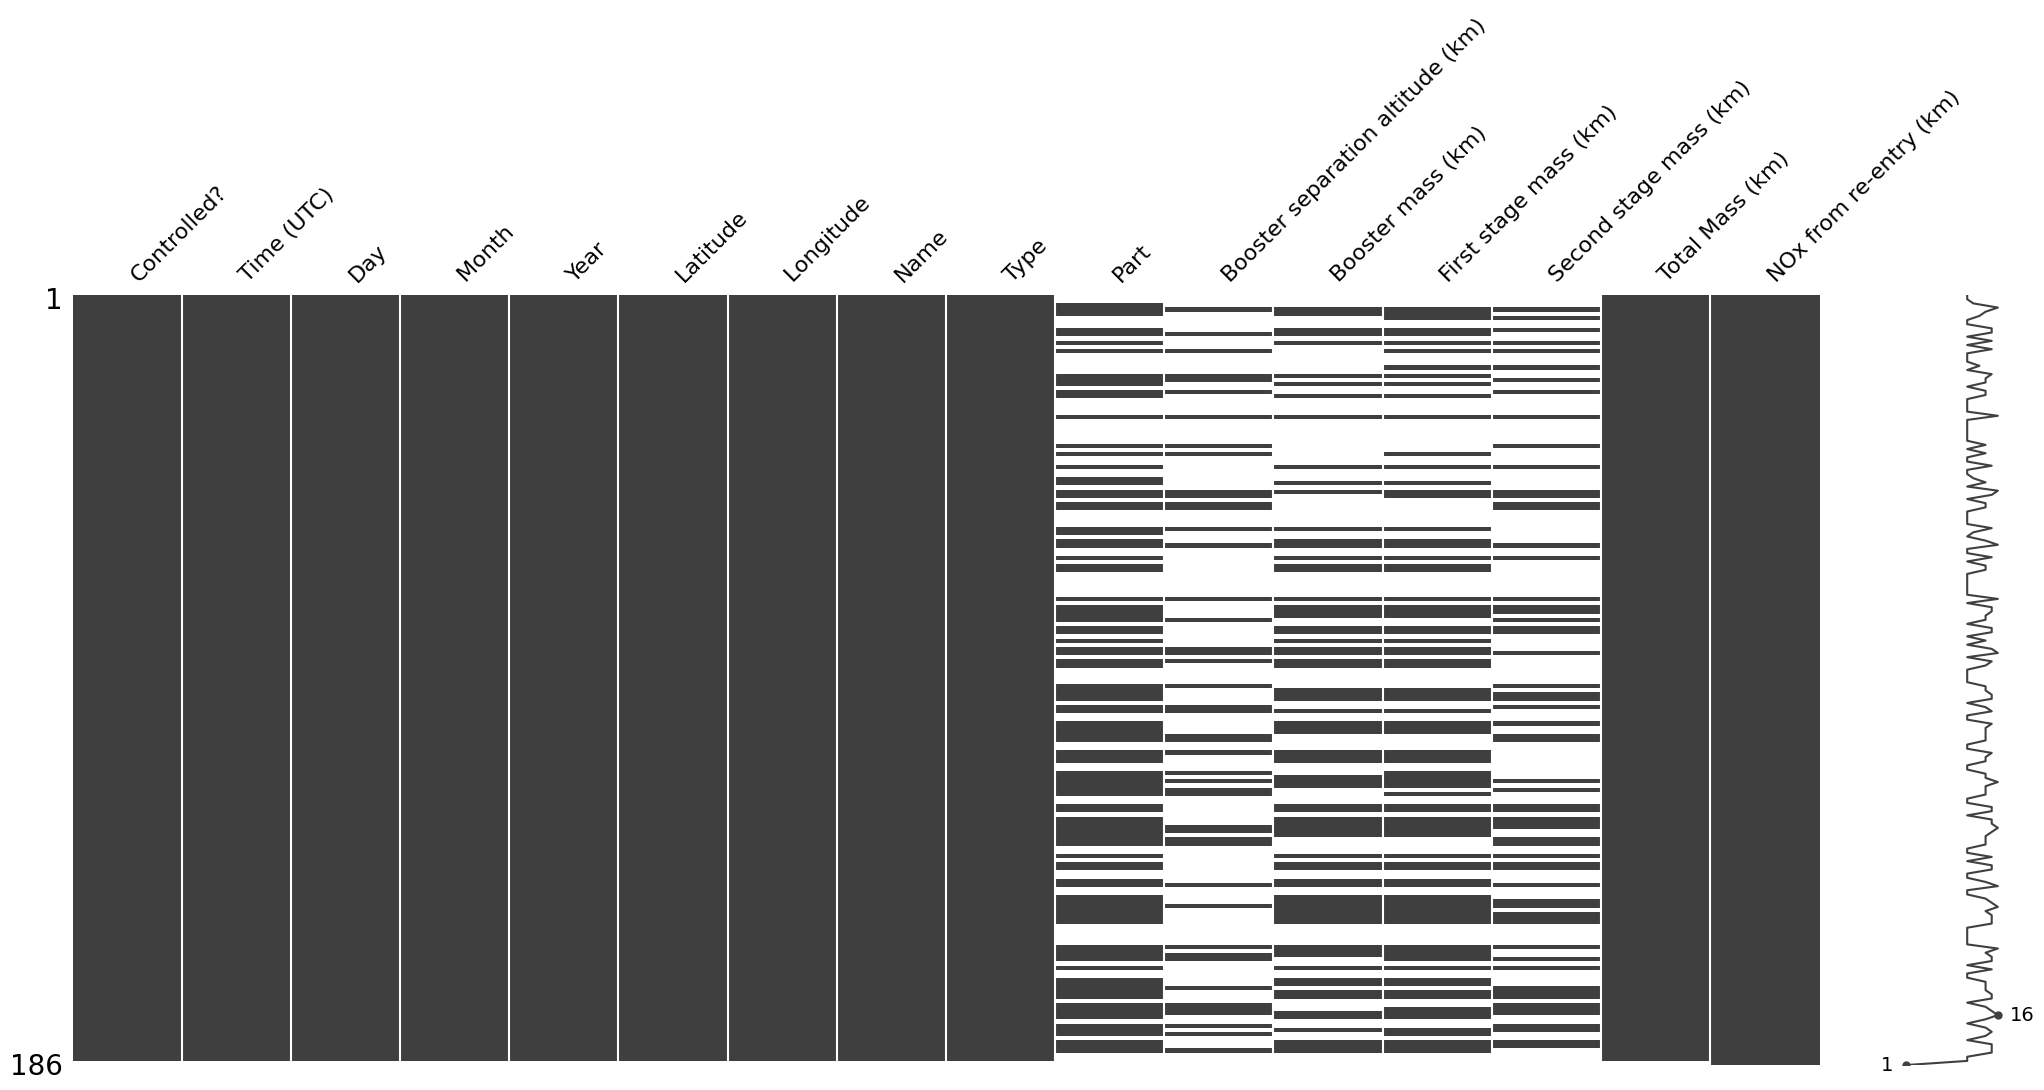

In [80]:
# Shows a matrix of NaN values for all the visual peoples
msno.matrix(reentries_df)
#What columns do we want to keep? 

## Cleaning Space X API df (dflaunch)

In [109]:
# Wrote DataFrame to a CSV file to cross check data in the dataframe, 
dflaunch.to_csv('dflaunch.csv', index=False)

In [112]:
#Dropped rows where Rocket Name column was empty 
#dflaunch.dropna(subset=['RocketName'])
# keep gridfins, reused, legs?

dflaunch.isna()
#to delete landingpad, block, flights

# to fill or delete nan values 

,FlightNumber,Date,RocketName,PayloadMassKG,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True
212,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True
213,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True
214,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True
